In [66]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

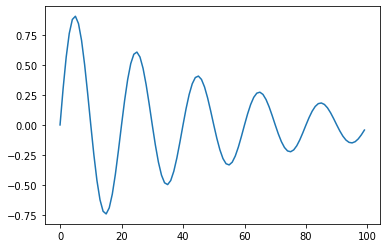

In [15]:
length = 100
freq = 5
alpha = 0.02
sine = [np.sin(2*np.pi*freq*(p/length))*np.exp(-alpha*p) for p in range(length)]
plt.figure()
plt.plot(sine)

In [14]:
min(sine)

-0.8187307530779819

In [16]:
def generate_sin(freq,length,alpha):
    return [np.sin(2*np.pi*freq*(p/length))*np.exp(-alpha*p) for p in range(length)]

In [73]:
def generate_example(n_patterns,length,output):
    plt.figure(figsize=(25,10))
    X,y = list(),list()
    for i in range(n_patterns):
        freq = np.random.randint(10,20)
        alpha = np.random.uniform(0.01,0.1)
        sin = generate_sin(freq,(length+output),alpha)
        X.append(sin[:length])
        y.append(sin[length:])
#         Sin.append(sin)
#         plt.plot(sin,'-')
    X = np.array(X).reshape(n_patterns,length,1)
    y = np.array(y).reshape(n_patterns,output)
    return X,y
        

In [75]:
X,y = generate_example(5,20,5)

<Figure size 1800x720 with 0 Axes>

In [76]:
#define model
output = 5
length = 50
Model = keras.models.Sequential()
Model.add(keras.layers.LSTM(20,return_sequences=True,input_shape=(length,1)))
Model.add(keras.layers.LSTM(20,input_shape=(length,1)))
Model.add(keras.layers.Dense(output))
Model.compile(loss='mae',optimizer='adam')
Model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 50, 20)            1760      
_________________________________________________________________
lstm_9 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 105       
Total params: 5,145
Trainable params: 5,145
Non-trainable params: 0
_________________________________________________________________


In [77]:
X,y = generate_example(10000,length,output)
Model.fit(X,y,epochs=1,batch_size=10)

Epoch 1/1
10000/10000 [==============================] - 36s 4ms/step - loss: 0.0441


<Figure size 1800x720 with 0 Axes>

In [92]:
X,y = generate_example(1,length,output)
yhat = Model.predict(X)

<Figure size 1800x720 with 0 Axes>

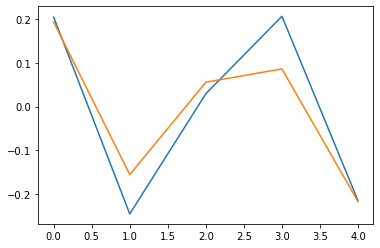

In [93]:
plt.figure()
plt.plot(y[0])
plt.plot(yhat[0])

In [86]:
X, y = generate_example(1000,length, output)
loss = Model.evaluate(X, y, verbose=0)
print( 'MAE: %f' % loss)

MAE: 0.017230


<Figure size 1800x720 with 0 Axes>